# Week 7 - Visualization & Wrangling

## Task Description

In [30]:
import pandas as pd
import numpy as np
from datetime import date,datetime

import seaborn as sns
import matplotlib.pyplot as plt

In [32]:
product = pd.read_csv('product_supplier.csv')
product.shape

(5504, 8)

In [34]:
data_orders = pd.read_csv('orders.csv', parse_dates = ['Date Order was placed', 'Delivery Date'])
data_orders.shape

C:\Users\tjhin irwan chandra\AppData\Local\Temp\ipykernel_19240\2722711615.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data_orders = pd.read_csv('orders.csv', parse_dates = ['Date Order was placed', 'Delivery Date'])
C:\Users\tjhin irwan chandra\AppData\Local\Temp\ipykernel_19240\2722711615.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data_orders = pd.read_csv('orders.csv', parse_dates = ['Date Order was placed', 'Delivery Date'])


(185013, 9)

In [36]:
data_orders.head()

,Customer ID,Customer Status,Date Order was placed,Delivery Date,Order ID,Product ID,Quantity Ordered,Total Retail Price for This Order,Cost Price Per Unit
0,579,Silver,2017-01-01,2017-01-07,123002578,220101400106,2,92.6,20.70
1,7574,SILVER,2017-01-01,2017-01-05,123004074,210201000009,1,21.7,9.95
2,28861,Gold,2017-01-01,2017-01-04,123000871,230100500068,1,1.7,0.80
3,43796,Gold,2017-01-01,2017-01-06,123002851,220100100633,1,47.9,24.05
4,54673,Gold,2017-01-01,2017-01-04,123003607,220200200043,1,36.9,18.30


In [38]:
data_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185013 entries, 0 to 185012
Data columns (total 9 columns):
 #   Column                             Non-Null Count   Dtype         
---  ------                             --------------   -----         
 0   Customer ID                        185013 non-null  int64         
 1   Customer Status                    185013 non-null  object        
 2   Date Order was placed              185013 non-null  datetime64[ns]
 3   Delivery Date                      185013 non-null  datetime64[ns]
 4   Order ID                           185013 non-null  int64         
 5   Product ID                         185013 non-null  int64         
 6   Quantity Ordered                   185013 non-null  int64         
 7   Total Retail Price for This Order  185013 non-null  float64       
 8   Cost Price Per Unit                185013 non-null  float64       
dtypes: datetime64[ns](2), float64(2), int64(4), object(1)
memory usage: 12.7+ MB


In [40]:
# gabung data product dengan data_orders
df = pd.merge(data_orders, product, on='Product ID', how='left')
df.shape
              

(185013, 16)

In [42]:
# check inconsistent data
df['Customer Status'].unique()

array(['Silver', 'SILVER', 'Gold', 'GOLD', 'PLATINUM', 'Platinum'],
      dtype=object)

In [43]:
# menyamakan inconsistent data
df['Customer Status'] = df['Customer Status'].str.upper()
df['Customer Status'].unique()

array(['SILVER', 'GOLD', 'PLATINUM'], dtype=object)

In [46]:
# check missing values
df.isnull().sum()

Customer ID                          0
Customer Status                      0
Date Order was placed                0
Delivery Date                        0
Order ID                             0
Product ID                           0
Quantity Ordered                     0
Total Retail Price for This Order    0
Cost Price Per Unit                  0
Product Line                         0
Product Category                     0
Product Group                        0
Product Name                         0
Supplier Country                     0
Supplier Name                        0
Supplier ID                          0
dtype: int64

In [48]:
# check duplicate data
df.duplicated().sum()

0

# 1. Product with highest profit percentage

In [51]:
# menambah unit price dari total retail price/qty
df['Unit Price'] = df['Total Retail Price for This Order'] / df['Quantity Ordered']
df.head()

,Customer ID,Customer Status,Date Order was placed,Delivery Date,Order ID,Product ID,Quantity Ordered,Total Retail Price for This Order,Cost Price Per Unit,Product Line,Product Category,Product Group,Product Name,Supplier Country,Supplier Name,Supplier ID,Unit Price
0,579,SILVER,2017-01-01,2017-01-07,123002578,220101400106,2,92.6,20.70,Clothes & Shoes,Clothes,Tracker Clothes,Casual V-Neck Men's Sweatshirt,US,3Top Sports,2963,46.3
1,7574,SILVER,2017-01-01,2017-01-05,123004074,210201000009,1,21.7,9.95,Children,Children Sports,Tracker Kid's Clothes,Children's Tee,US,3Top Sports,2963,21.7
2,28861,GOLD,2017-01-01,2017-01-04,123000871,230100500068,1,1.7,0.80,Outdoors,Outdoors,Outdoor Gear,Plate Picnic Deep,GB,Prime Sports Ltd,316,1.7
3,43796,GOLD,2017-01-01,2017-01-06,123002851,220100100633,1,47.9,24.05,Clothes & Shoes,Clothes,Eclipse Clothing,Woman's Woven Pants L,US,Eclipse Inc,1303,47.9
4,54673,GOLD,2017-01-01,2017-01-04,123003607,220200200043,1,36.9,18.30,Clothes & Shoes,Shoes,Shoes,Soft Gel Court Men's Indoor Shoes,US,Pro Sportswear Inc,1747,36.9


In [53]:
# Menambahkan profit presentase coloumn pada dataframe
df['Profit Percentage'] = (df['Unit Price'] - df['Cost Price Per Unit'])*100/df['Cost Price Per Unit']
df['Profit Percentage'] = round(df['Profit Percentage'],2)
df.head()

,Customer ID,Customer Status,Date Order was placed,Delivery Date,Order ID,Product ID,Quantity Ordered,Total Retail Price for This Order,Cost Price Per Unit,Product Line,Product Category,Product Group,Product Name,Supplier Country,Supplier Name,Supplier ID,Unit Price,Profit Percentage
0,579,SILVER,2017-01-01,2017-01-07,123002578,220101400106,2,92.6,20.70,Clothes & Shoes,Clothes,Tracker Clothes,Casual V-Neck Men's Sweatshirt,US,3Top Sports,2963,46.3,123.67
1,7574,SILVER,2017-01-01,2017-01-05,123004074,210201000009,1,21.7,9.95,Children,Children Sports,Tracker Kid's Clothes,Children's Tee,US,3Top Sports,2963,21.7,118.09
2,28861,GOLD,2017-01-01,2017-01-04,123000871,230100500068,1,1.7,0.80,Outdoors,Outdoors,Outdoor Gear,Plate Picnic Deep,GB,Prime Sports Ltd,316,1.7,112.50
3,43796,GOLD,2017-01-01,2017-01-06,123002851,220100100633,1,47.9,24.05,Clothes & Shoes,Clothes,Eclipse Clothing,Woman's Woven Pants L,US,Eclipse Inc,1303,47.9,99.17
4,54673,GOLD,2017-01-01,2017-01-04,123003607,220200200043,1,36.9,18.30,Clothes & Shoes,Shoes,Shoes,Soft Gel Court Men's Indoor Shoes,US,Pro Sportswear Inc,1747,36.9,101.64


In [55]:
top_5_category = df.groupby('Product Category')['Profit Percentage'].mean().reset_index()
top_5_category = top_5_category.sort_values(by='Profit Percentage', ascending=False).head(5)
top_5_category.head()


,Product Category,Profit Percentage
3,Golf,186.191469
6,Racket Sports,147.656036
9,Swim Sports,145.335964
11,Winter Sports,129.279929
10,Team Sports,125.446239


C:\Users\tjhin irwan chandra\AppData\Local\Temp\ipykernel_19240\4281513393.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_5_category, x='Product Category', y='Profit Percentage', palette='viridis')


<Axes: xlabel='Product Category', ylabel='Profit Percentage'>

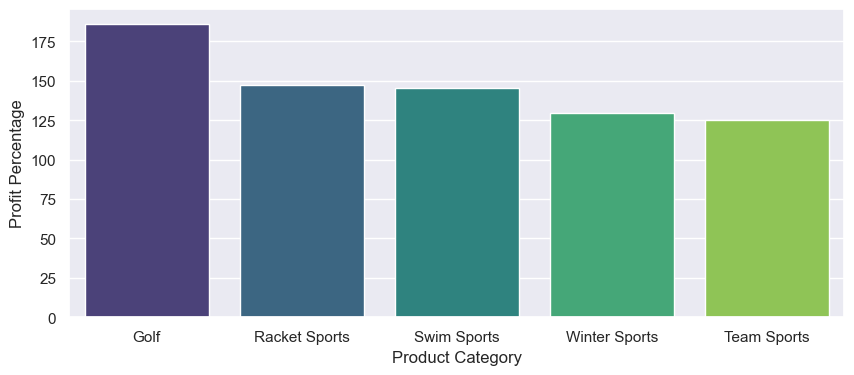

In [57]:
# Visualitation grafik bar
plt.figure(figsize=(10,4))
sns.barplot(data=top_5_category, x='Product Category', y='Profit Percentage', palette='viridis')

# 2. Profit Obtained month over month of every year

In [60]:
# mengesktrak informasi bulan dan tahun

df['day_of_order'] = df['Date Order was placed'].dt.day
df['month_of_order'] = df['Date Order was placed'].dt.month
df['year_of_order'] = df['Date Order was placed'].dt.year

df.head()

,Customer ID,Customer Status,Date Order was placed,Delivery Date,Order ID,Product ID,Quantity Ordered,Total Retail Price for This Order,Cost Price Per Unit,Product Line,...,Product Group,Product Name,Supplier Country,Supplier Name,Supplier ID,Unit Price,Profit Percentage,day_of_order,month_of_order,year_of_order
0,579,SILVER,2017-01-01,2017-01-07,123002578,220101400106,2,92.6,20.70,Clothes & Shoes,...,Tracker Clothes,Casual V-Neck Men's Sweatshirt,US,3Top Sports,2963,46.3,123.67,1,1,2017
1,7574,SILVER,2017-01-01,2017-01-05,123004074,210201000009,1,21.7,9.95,Children,...,Tracker Kid's Clothes,Children's Tee,US,3Top Sports,2963,21.7,118.09,1,1,2017
2,28861,GOLD,2017-01-01,2017-01-04,123000871,230100500068,1,1.7,0.80,Outdoors,...,Outdoor Gear,Plate Picnic Deep,GB,Prime Sports Ltd,316,1.7,112.50,1,1,2017
3,43796,GOLD,2017-01-01,2017-01-06,123002851,220100100633,1,47.9,24.05,Clothes & Shoes,...,Eclipse Clothing,Woman's Woven Pants L,US,Eclipse Inc,1303,47.9,99.17,1,1,2017
4,54673,GOLD,2017-01-01,2017-01-04,123003607,220200200043,1,36.9,18.30,Clothes & Shoes,...,Shoes,Soft Gel Court Men's Indoor Shoes,US,Pro Sportswear Inc,1747,36.9,101.64,1,1,2017


In [62]:
# menghitung profit
df['profit'] = df['Total Retail Price for This Order'] - (df['Cost Price Per Unit'] * df['Quantity Ordered'])
df.head()

,Customer ID,Customer Status,Date Order was placed,Delivery Date,Order ID,Product ID,Quantity Ordered,Total Retail Price for This Order,Cost Price Per Unit,Product Line,...,Product Name,Supplier Country,Supplier Name,Supplier ID,Unit Price,Profit Percentage,day_of_order,month_of_order,year_of_order,profit
0,579,SILVER,2017-01-01,2017-01-07,123002578,220101400106,2,92.6,20.70,Clothes & Shoes,...,Casual V-Neck Men's Sweatshirt,US,3Top Sports,2963,46.3,123.67,1,1,2017,51.20
1,7574,SILVER,2017-01-01,2017-01-05,123004074,210201000009,1,21.7,9.95,Children,...,Children's Tee,US,3Top Sports,2963,21.7,118.09,1,1,2017,11.75
2,28861,GOLD,2017-01-01,2017-01-04,123000871,230100500068,1,1.7,0.80,Outdoors,...,Plate Picnic Deep,GB,Prime Sports Ltd,316,1.7,112.50,1,1,2017,0.90
3,43796,GOLD,2017-01-01,2017-01-06,123002851,220100100633,1,47.9,24.05,Clothes & Shoes,...,Woman's Woven Pants L,US,Eclipse Inc,1303,47.9,99.17,1,1,2017,23.85
4,54673,GOLD,2017-01-01,2017-01-04,123003607,220200200043,1,36.9,18.30,Clothes & Shoes,...,Soft Gel Court Men's Indoor Shoes,US,Pro Sportswear Inc,1747,36.9,101.64,1,1,2017,18.60


In [64]:
# menggabungkan total profit per bulan
profit_month = df.groupby(['month_of_order', 'year_of_order'])['profit'].sum().to_frame().reset_index()
profit_month.sample(5)

,month_of_order,year_of_order,profit
6,2,2018,171451.940
8,2,2020,165642.510
59,12,2021,493914.395
19,4,2021,238447.865
1,1,2018,194191.740


NameError: name 'ticker' is not defined

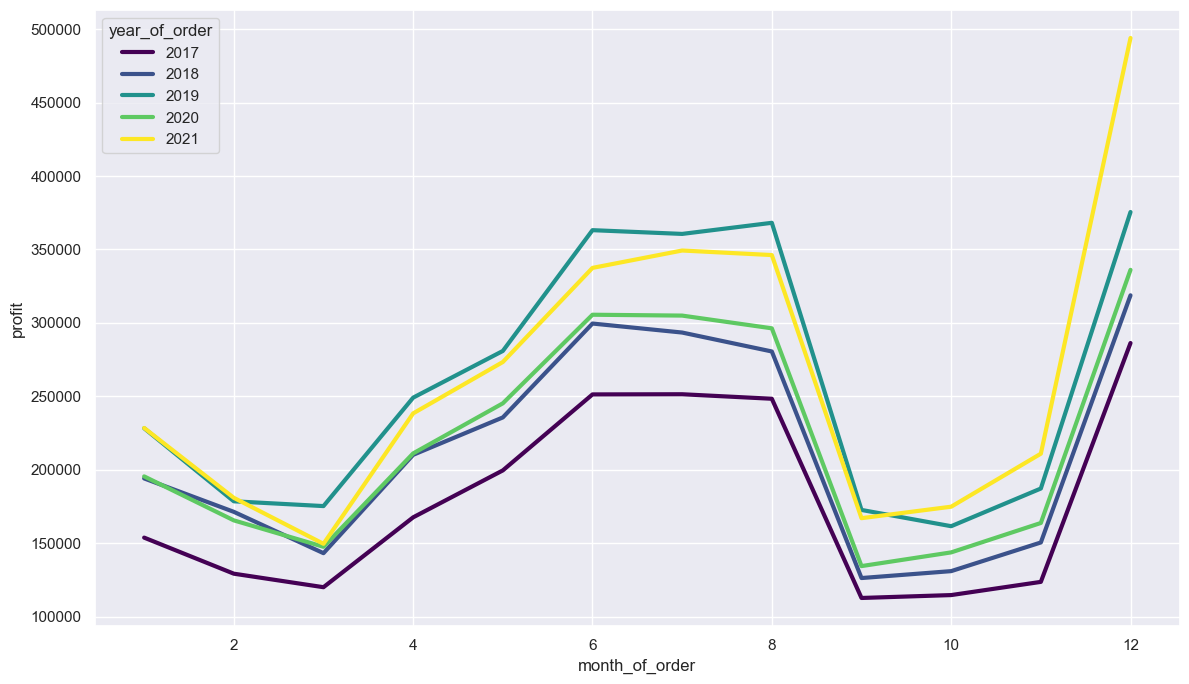

In [66]:
# visualisasi data profit per bulan
sns.set_style('darkgrid') # style
sns.set(rc={'figure.figsize' : (14, 8)}) # mengatur ukuran gambar

ax = sns.lineplot(data=profit_month, x='month_of_order', y='profit',
                  hue='year_of_order', palette='viridis',
                  legend='full', lw=3) # membuat lineplot

ax.xaxis.set_major_locator(ticker.MultipleLocator(1)) # mengatur sumbu x bertambah 1
plt.title('Profit Obtained Month Over Month of Every Year')
plt.legend(bbox_to_anchor=(1,1)) # membuat legend
plt.ylabel('Profit')
plt.xlabel('Month')
plt.show()

# 3. Does the lower the cost, the higher the profit? Does the cheaper the price the more people buy?

<Axes: xlabel='Cost Price Per Unit', ylabel='profit'>

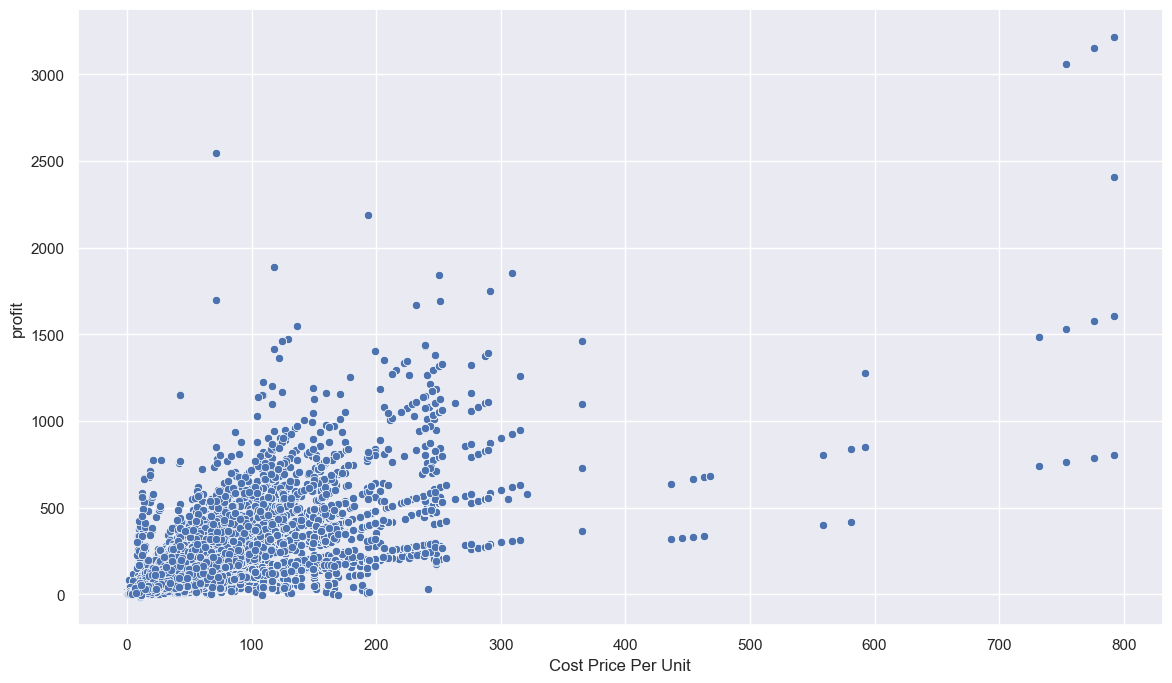

In [68]:
# Lower Cost, higher profit
sns.scatterplot(data=df, x ='Cost Price Per Unit', y='profit') 

In [ ]:
'''
insight yg diddapat dari grafik diatas:
1. harga berbanding lurus dengan profit
'''

<Axes: xlabel='Unit Price', ylabel='Quantity Ordered'>

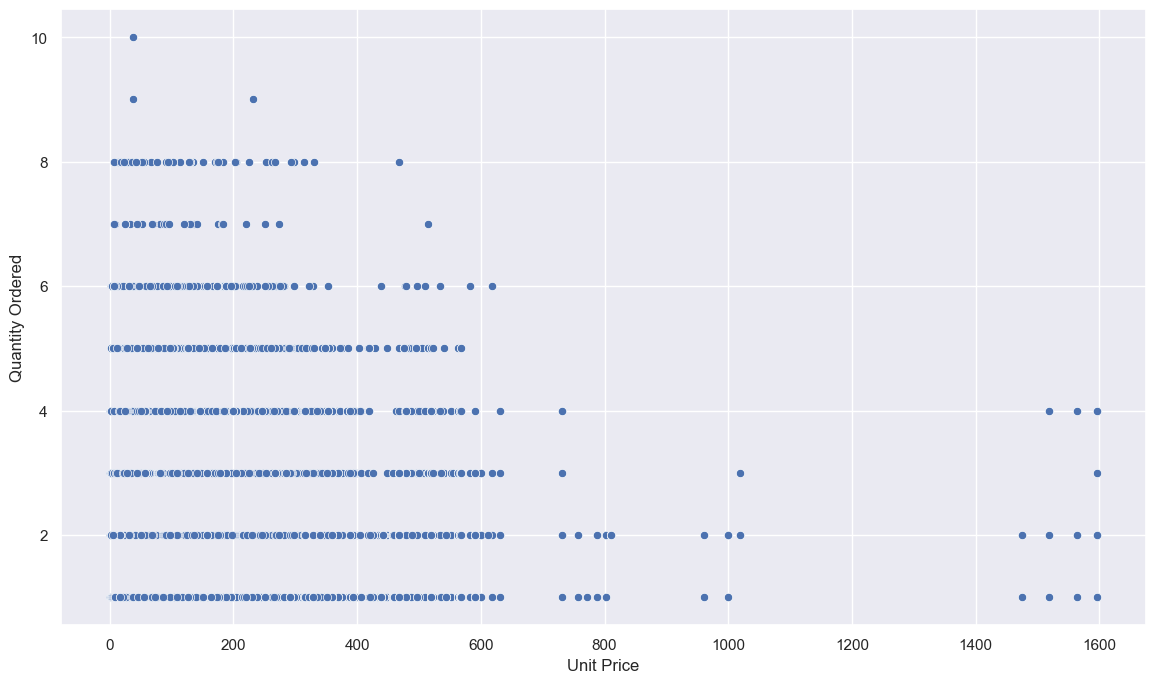

In [70]:
# Cheaper price the more people buy
sns.scatterplot(data=df, x ='Unit Price', y='Quantity Ordered') 

# 4. Show the top 3 of the most favorite product in the latest year¶

In [74]:
# Filter data untuk tahun 2021
df_2021 = df[df['year_of_order']== 2021]

# group by 'Product Category' dan sum 'quantity ordered'
top_3_category_2021 = df_2021.groupby('Product Category')['Quantity Ordered'].sum().reset_index()

# sort in descending dan dapat top 3
top_3_category_2021 = top_3_category_2021.sort_values(by='Quantity Ordered', ascending=False).head(3)

# Menampilkan Hasil
top_3_category_2021.head()

,Product Category,Quantity Ordered
2,Clothes,14021
0,Assorted Sports Articles,10806
5,Outdoors,10704


C:\Users\tjhin irwan chandra\AppData\Local\Temp\ipykernel_19240\3991374316.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_3_category_2021, x='Product Category', y='Quantity Ordered', palette='viridis')


<Axes: xlabel='Product Category', ylabel='Quantity Ordered'>

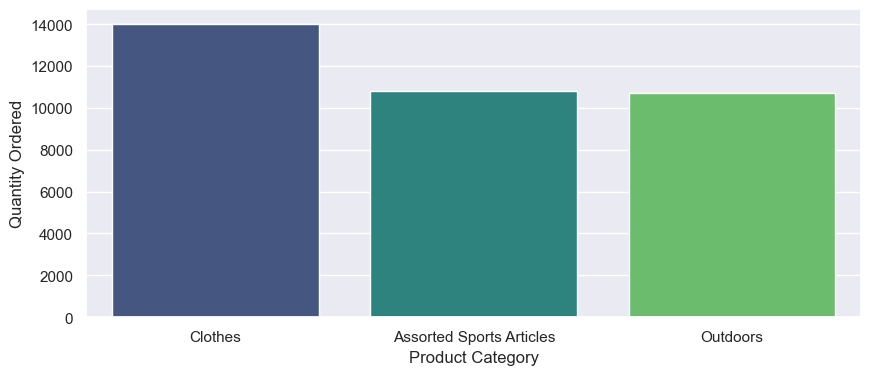

In [76]:
# Visualitation grafik bar
plt.figure(figsize=(10,4))
sns.barplot(data=top_3_category_2021, x='Product Category', y='Quantity Ordered', palette='viridis')

# 5. The order-to-delivery length of every month in the latest year:

In [83]:
# calculate order to delivery 
df['Order to Delivery Days'] = (df['Delivery Date'] - df['Date Order was placed']).dt.days
df.head()

,Customer ID,Customer Status,Date Order was placed,Delivery Date,Order ID,Product ID,Quantity Ordered,Total Retail Price for This Order,Cost Price Per Unit,Product Line,...,Supplier Country,Supplier Name,Supplier ID,Unit Price,Profit Percentage,day_of_order,month_of_order,year_of_order,profit,Order to Delivery Days
0,579,SILVER,2017-01-01,2017-01-07,123002578,220101400106,2,92.6,20.70,Clothes & Shoes,...,US,3Top Sports,2963,46.3,123.67,1,1,2017,51.20,6
1,7574,SILVER,2017-01-01,2017-01-05,123004074,210201000009,1,21.7,9.95,Children,...,US,3Top Sports,2963,21.7,118.09,1,1,2017,11.75,4
2,28861,GOLD,2017-01-01,2017-01-04,123000871,230100500068,1,1.7,0.80,Outdoors,...,GB,Prime Sports Ltd,316,1.7,112.50,1,1,2017,0.90,3
3,43796,GOLD,2017-01-01,2017-01-06,123002851,220100100633,1,47.9,24.05,Clothes & Shoes,...,US,Eclipse Inc,1303,47.9,99.17,1,1,2017,23.85,5
4,54673,GOLD,2017-01-01,2017-01-04,123003607,220200200043,1,36.9,18.30,Clothes & Shoes,...,US,Pro Sportswear Inc,1747,36.9,101.64,1,1,2017,18.60,3


In [85]:
# Filter data untuk tahun 2021
df_2021 = df[df['year_of_order']== 2021]


# Group and aggregate
order_delivery_minmax = df_2021.groupby('month_of_order')['Order to Delivery Days'].agg(['min', 'max'])

# Rename columns (optional)
order_delivery_minmax = order_delivery_minmax.rename(columns={'month_of_order': 'month', 'min': 'order_to_delivery_length', 'max': 'the_longest_order_to_delivery_length'}
                                                    )

order_delivery_minmax


,order_to_delivery_length,the_longest_order_to_delivery_length
month_of_order,,
1,0,20
2,0,20
3,0,23
4,0,19
5,0,18
6,0,16
7,0,21
8,0,17
9,0,21
